A notebook for making plots to compare the existing quantum networks in literature.

Todo:
* generate a numbered table of references
* also generate the table in raw LateX
* add the number corresponding to the refernce above the data point in the plot

Ambitious todo:
* add wavelength of exchanged photons to the json file
* add distance between nodes to the json file
* make a plot in which rate is normalized to the wavelength-dependent decay in length L of fiber $exp(-k(\lambda)L)$ (this makes for a more fair comparison)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import bibtexparser as btp
import json

In [2]:
# load refs from bibfile to get article info
with open('quantum_network_refs.bib') as bibtex_file:
    bib_database = btp.load(bibtex_file)

# load json file which has the same bibtex IDs (e.g. Stephenson2020)
# as the refs listed in the bibfile and contains the quantum network
# parameters for each entry (entanglement rate, fidelity, qubit type, etc)
with open("quantum_network_stats.json") as f:
    stats_dict = json.load(f)

atoms
3
ions
5
NVs
3
qdots
1


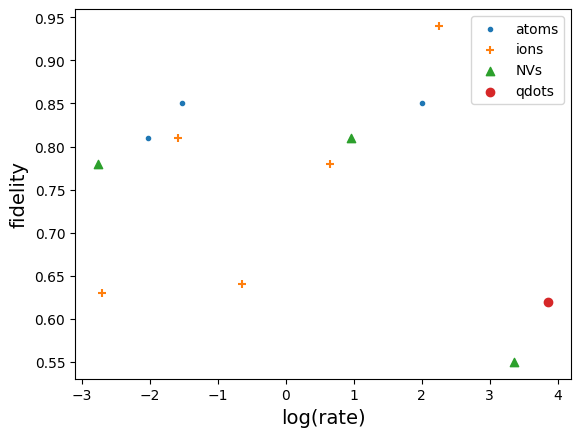

In [3]:
platforms = ['atoms','ions','NVs','qdots']
plat_dict = {'atoms':'.','ions':'+','NVs':'^','qdots':'o'}

labelsize=14
fig,ax = plt.subplots()
for platform in platforms:
    entries = [entry for entry in bib_database.entries if stats_dict[entry['ID']]['platform']==platform]
    ax.scatter(np.log10([stats_dict[entry['ID']]['rate'] for entry in entries]),
               [stats_dict[entry['ID']]['fidelity'] for entry in entries], marker=plat_dict[platform],label=platform)
    print(platform)
    print(len(entries))
#     ax.scatter(np.log10(rate_list),fidelity_list)
ax.set_xlabel('log(rate)',fontsize=labelsize)
ax.set_ylabel('fidelity',fontsize=labelsize)
ax.legend()